<a href="https://colab.research.google.com/github/SudhanshuSekharNaik/tubercluosis_prediction/blob/main/tb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

🧪 TUBERCULOSIS PREDICTION USING LOGISTIC REGRESSION

1. GENERATING TUBERCULOSIS DATASET...
=== TUBERCULOSIS DATASET OVERVIEW ===
Total samples: 400
TB Patients: 200 (50.0%)
Controls: 200 (50.0%)


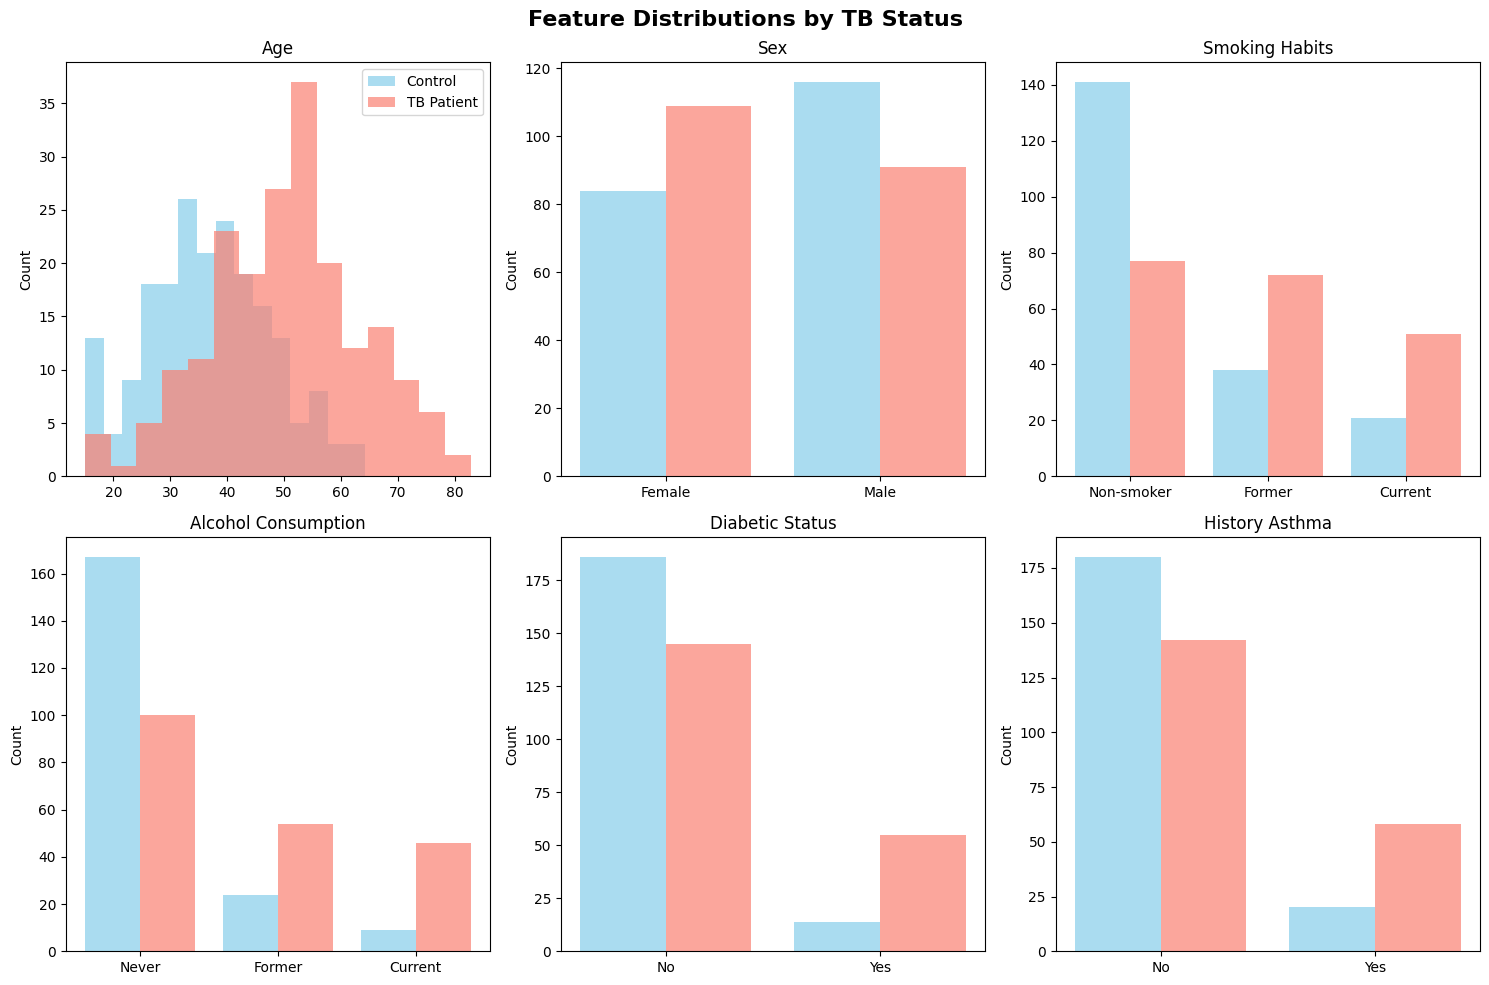


2. PREPROCESSING DATA...
Training set: 280 samples
Testing set: 120 samples

3. TRAINING LOGISTIC REGRESSION MODEL...
 Logistic Regression model trained successfully

4. MODEL EVALUATION...
 MODEL PERFORMANCE METRICS
Accuracy:    0.8583
Precision:   0.8772
Recall:      0.8333
F1-Score:    0.8547
AUC Score:   0.9125
Sensitivity: 0.8333
Specificity: 0.8833

 CONFUSION MATRIX BREAKDOWN
True Positives (TP):  50
True Negatives (TN):  53
False Positives (FP): 7
False Negatives (FN): 10

 CLASSIFICATION REPORT
              precision    recall  f1-score   support

     Control       0.84      0.88      0.86        60
  TB Patient       0.88      0.83      0.85        60

    accuracy                           0.86       120
   macro avg       0.86      0.86      0.86       120
weighted avg       0.86      0.86      0.86       120


5. GENERATING VISUALIZATIONS...


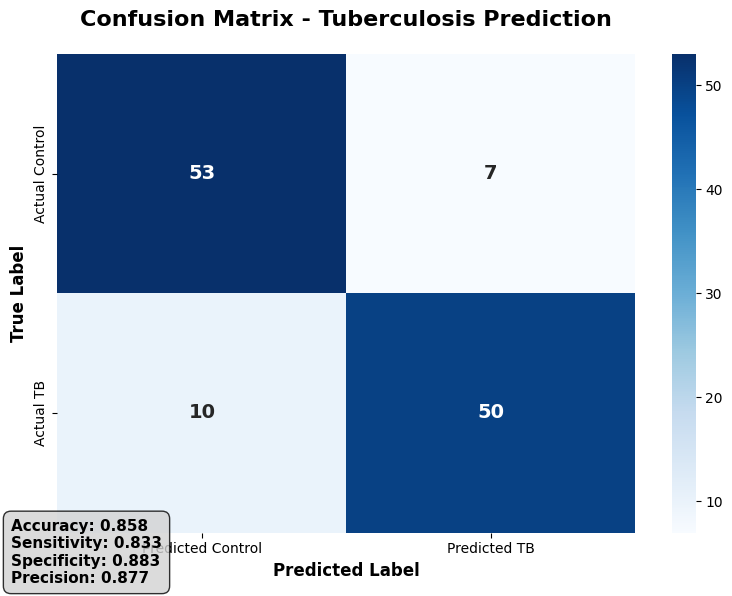

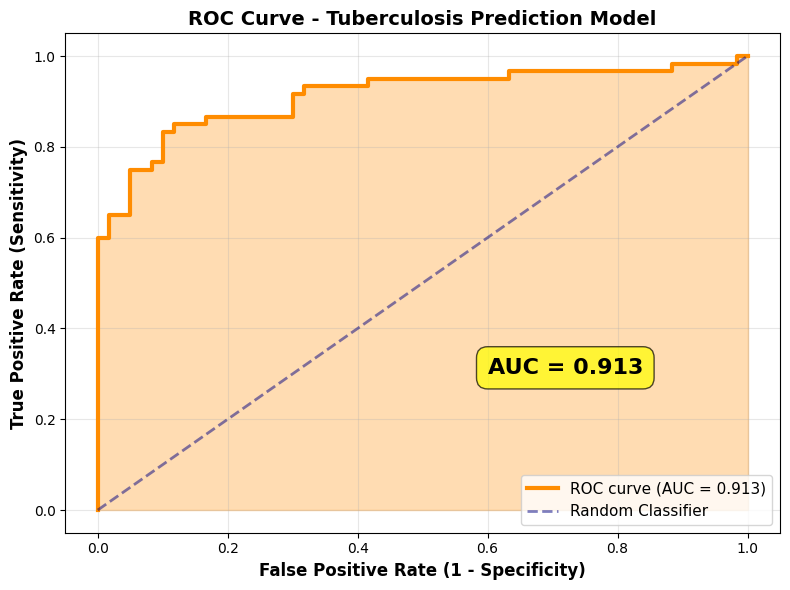

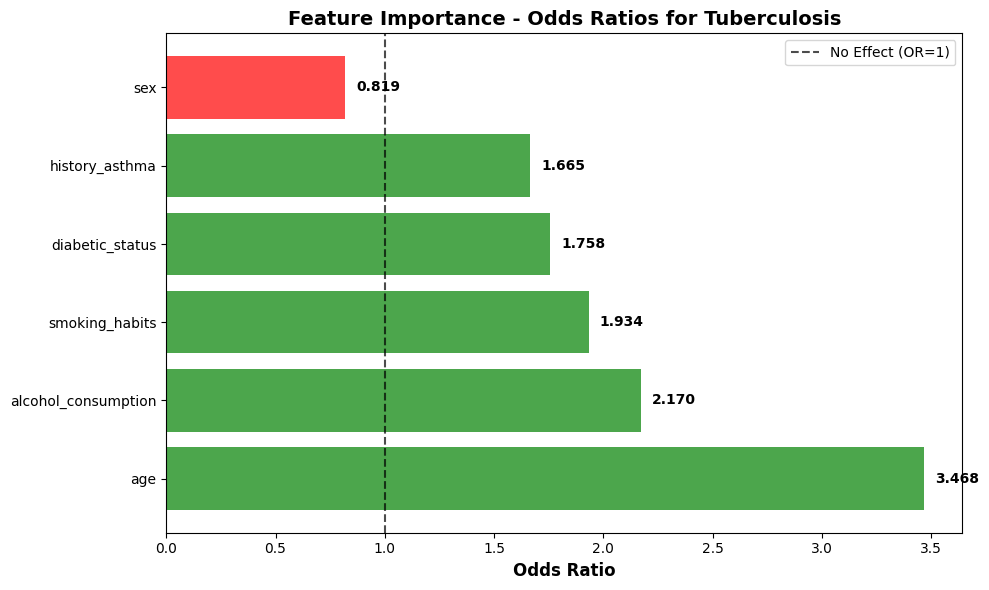


=== FEATURE IMPORTANCE (ODDS RATIOS) ===
               Feature  Coefficient  Odds_Ratio
0                  age       1.2436      3.4682
3  alcohol_consumption       0.7746      2.1698
2       smoking_habits       0.6594      1.9337
4      diabetic_status       0.5641      1.7578
5       history_asthma       0.5098      1.6650
1                  sex      -0.1992      0.8193

6. INDIVIDUAL PATIENT PREDICTIONS...

--- Patient Case 1 ---

 PATIENT RISK ASSESSMENT
Patient Features:
  • Age (years): 65
  • Sex (0=Female, 1=Male): 1
  • Smoking (0=Never, 1=Former, 2=Current): 2
  • Alcohol (0=Never, 1=Former, 2=Current): 2
  • Diabetes (0=No, 1=Yes): 1
  • Asthma (0=No, 1=Yes): 1

 Prediction Results:
  TB Probability: 0.999 (99.9%)
  Prediction: TB PATIENT
  Risk Level: HIGH RISK
  Recommendation: Immediate medical attention required

--- Patient Case 2 ---

 PATIENT RISK ASSESSMENT
Patient Features:
  • Age (years): 25
  • Sex (0=Female, 1=Male): 0
  • Smoking (0=Never, 1=Former, 2=Curren

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, classification_report,
                           confusion_matrix, roc_auc_score, roc_curve,
                           precision_score, recall_score, f1_score)
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set style for better plots
plt.style.use('default')
sns.set_palette("husl")

class TuberculosisPredictor:
    def __init__(self):
        self.model = None
        self.scaler = StandardScaler()
        self.feature_names = ['age', 'sex', 'smoking_habits', 'alcohol_consumption',
                            'diabetic_status', 'history_asthma']

    def generate_tb_data(self, n_samples=400):
        """Generate tuberculosis dataset based on clinical risk factors"""
        np.random.seed(42)

        data = []

        for i in range(n_samples):
            # Generate TB patients (50% of dataset)
            if i < n_samples // 2:
                # Higher risk profiles for TB patients
                age = np.random.normal(50, 15)  # Older age
                sex = np.random.choice([0, 1], p=[0.55, 0.45])  # Slight male predominance
                smoking = np.random.choice([0, 1, 2], p=[0.4, 0.3, 0.3])  # More smokers
                alcohol = np.random.choice([0, 1, 2], p=[0.5, 0.3, 0.2])  # More drinkers
                diabetic = np.random.choice([0, 1], p=[0.7, 0.3])  # More diabetics
                asthma = np.random.choice([0, 1], p=[0.75, 0.25])  # More asthma
                tb_status = 1
            else:
                # Lower risk profiles for controls
                age = np.random.normal(35, 12)  # Younger age
                sex = np.random.choice([0, 1], p=[0.45, 0.55])  # Slight female predominance
                smoking = np.random.choice([0, 1, 2], p=[0.7, 0.2, 0.1])  # Fewer smokers
                alcohol = np.random.choice([0, 1, 2], p=[0.8, 0.15, 0.05])  # Fewer drinkers
                diabetic = np.random.choice([0, 1], p=[0.9, 0.1])  # Fewer diabetics
                asthma = np.random.choice([0, 1], p=[0.9, 0.1])  # Less asthma
                tb_status = 0

            # Ensure age is within reasonable bounds
            age = max(15, min(85, age))

            data.append([age, sex, smoking, alcohol, diabetic, asthma, tb_status])

        df = pd.DataFrame(data, columns=self.feature_names + ['tb_status'])
        return df

    def explore_dataset(self, df):
        """Explore the tuberculosis dataset"""
        print("=== TUBERCULOSIS DATASET OVERVIEW ===")
        print(f"Total samples: {len(df)}")
        print(f"TB Patients: {df['tb_status'].sum()} ({df['tb_status'].mean():.1%})")
        print(f"Controls: {len(df) - df['tb_status'].sum()} ({1 - df['tb_status'].mean():.1%})")

        # Feature distributions
        fig, axes = plt.subplots(2, 3, figsize=(15, 10))
        fig.suptitle('Feature Distributions by TB Status', fontsize=16, fontweight='bold')

        for i, feature in enumerate(self.feature_names):
            row, col = i // 3, i % 3
            ax = axes[row, col]

            # Plot distributions for TB vs Control
            for status, color, label in [(0, 'skyblue', 'Control'), (1, 'salmon', 'TB Patient')]:
                subset = df[df['tb_status'] == status][feature]
                if feature == 'age':
                    # For continuous age, use histogram
                    ax.hist(subset, alpha=0.7, color=color, label=label, bins=15)
                else:
                    # For categorical, use bar plot
                    value_counts = subset.value_counts().sort_index()
                    ax.bar(np.arange(len(value_counts)) + (0.2 if status == 1 else -0.2),
                          value_counts.values, width=0.4, alpha=0.7, color=color, label=label)
                    ax.set_xticks(np.arange(len(value_counts)))
                    if feature == 'smoking_habits':
                        ax.set_xticklabels(['Non-smoker', 'Former', 'Current'])
                    elif feature == 'alcohol_consumption':
                        ax.set_xticklabels(['Never', 'Former', 'Current'])
                    elif feature == 'sex':
                        ax.set_xticklabels(['Female', 'Male'])
                    else:
                        ax.set_xticklabels(['No', 'Yes'])

            ax.set_title(f'{feature.replace("_", " ").title()}')
            ax.set_ylabel('Count')
            if i == 0:
                ax.legend()

        plt.tight_layout()
        plt.show()

        return df

    def preprocess_data(self, df):
        """Prepare data for logistic regression"""
        X = df[self.feature_names]
        y = df['tb_status']

        # Scale features
        X_scaled = self.scaler.fit_transform(X)

        return X_scaled, y

    def train_logistic_model(self, X_train, y_train):
        """Train logistic regression model"""
        self.model = LogisticRegression(
            random_state=42,
            max_iter=1000,
            solver='liblinear',
            C=1.0
        )

        self.model.fit(X_train, y_train)
        print("✅ Logistic Regression model trained successfully")
        return self.model

    def plot_confusion_matrix(self, y_true, y_pred):
        """Create a detailed confusion matrix visualization"""
        cm = confusion_matrix(y_true, y_pred)
        tn, fp, fn, tp = cm.ravel()

        plt.figure(figsize=(8, 6))

        # Create heatmap
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                    xticklabels=['Predicted Control', 'Predicted TB'],
                    yticklabels=['Actual Control', 'Actual TB'],
                    annot_kws={'size': 14, 'weight': 'bold'})

        plt.title('Confusion Matrix - Tuberculosis Prediction',
                 fontsize=16, fontweight='bold', pad=20)
        plt.xlabel('Predicted Label', fontsize=12, fontweight='bold')
        plt.ylabel('True Label', fontsize=12, fontweight='bold')

        # Add performance metrics
        accuracy = accuracy_score(y_true, y_pred)
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)
        precision = precision_score(y_true, y_pred)

        metrics_text = f'Accuracy: {accuracy:.3f}\nSensitivity: {sensitivity:.3f}\nSpecificity: {specificity:.3f}\nPrecision: {precision:.3f}'
        plt.figtext(0.02, 0.02, metrics_text, fontsize=11,
                   bbox=dict(boxstyle="round,pad=0.5", facecolor='lightgray', alpha=0.8),
                   fontweight='bold')

        plt.tight_layout()
        plt.show()

        return cm

    def plot_roc_curve(self, X, y):
        """Plot ROC curve with AUC score"""
        y_pred_proba = self.model.predict_proba(X)[:, 1]
        fpr, tpr, thresholds = roc_curve(y, y_pred_proba)
        auc_score = roc_auc_score(y, y_pred_proba)

        plt.figure(figsize=(8, 6))

        # Plot ROC curve
        plt.plot(fpr, tpr, color='darkorange', lw=3, label=f'ROC curve (AUC = {auc_score:.3f})')
        plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', alpha=0.5, label='Random Classifier')

        # Fill area under curve
        plt.fill_between(fpr, tpr, alpha=0.3, color='darkorange')

        plt.xlim([-0.05, 1.05])
        plt.ylim([-0.05, 1.05])
        plt.xlabel('False Positive Rate (1 - Specificity)', fontsize=12, fontweight='bold')
        plt.ylabel('True Positive Rate (Sensitivity)', fontsize=12, fontweight='bold')
        plt.title('ROC Curve - Tuberculosis Prediction Model', fontsize=14, fontweight='bold')
        plt.legend(loc="lower right", fontsize=11)
        plt.grid(True, alpha=0.3)

        # Highlight the AUC score
        plt.text(0.6, 0.3, f'AUC = {auc_score:.3f}', fontsize=16,
                bbox=dict(boxstyle="round,pad=0.5", facecolor='yellow', alpha=0.7),
                fontweight='bold')

        plt.tight_layout()
        plt.show()

        return auc_score

    def plot_feature_importance(self):
        """Plot feature importance using logistic regression coefficients"""
        if self.model is None:
            print("Model not trained yet!")
            return

        coefficients = self.model.coef_[0]
        odds_ratios = np.exp(coefficients)

        # Create feature importance dataframe
        feature_importance = pd.DataFrame({
            'Feature': self.feature_names,
            'Coefficient': coefficients,
            'Odds_Ratio': odds_ratios
        }).sort_values('Odds_Ratio', ascending=False)

        # Plot
        plt.figure(figsize=(10, 6))
        colors = ['red' if x < 1 else 'green' for x in feature_importance['Odds_Ratio']]
        bars = plt.barh(feature_importance['Feature'], feature_importance['Odds_Ratio'],
                       color=colors, alpha=0.7)

        plt.axvline(x=1, color='black', linestyle='--', alpha=0.7, label='No Effect (OR=1)')
        plt.xlabel('Odds Ratio', fontsize=12, fontweight='bold')
        plt.title('Feature Importance - Odds Ratios for Tuberculosis',
                 fontsize=14, fontweight='bold')
        plt.legend()

        # Add value labels
        for bar, value in zip(bars, feature_importance['Odds_Ratio']):
            plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height()/2,
                    f'{value:.3f}', va='center', fontsize=10, fontweight='bold')

        plt.tight_layout()
        plt.show()

        print("\n=== FEATURE IMPORTANCE (ODDS RATIOS) ===")
        print(feature_importance.round(4))

        return feature_importance

    def evaluate_model(self, X_test, y_test):
        """Comprehensive model evaluation"""
        y_pred = self.model.predict(X_test)
        y_pred_proba = self.model.predict_proba(X_test)[:, 1]

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)
        auc_score = roc_auc_score(y_test, y_pred_proba)

        # Confusion matrix components
        cm = confusion_matrix(y_test, y_pred)
        tn, fp, fn, tp = cm.ravel()
        sensitivity = tp / (tp + fn)
        specificity = tn / (tn + fp)

        print("📊 MODEL PERFORMANCE METRICS")
        print("=" * 40)
        print(f"Accuracy:    {accuracy:.4f}")
        print(f"Precision:   {precision:.4f}")
        print(f"Recall:      {recall:.4f}")
        print(f"F1-Score:    {f1:.4f}")
        print(f"AUC Score:   {auc_score:.4f}")
        print(f"Sensitivity: {sensitivity:.4f}")
        print(f"Specificity: {specificity:.4f}")

        print("\n📈 CONFUSION MATRIX BREAKDOWN")
        print("=" * 40)
        print(f"True Positives (TP):  {tp}")
        print(f"True Negatives (TN):  {tn}")
        print(f"False Positives (FP): {fp}")
        print(f"False Negatives (FN): {fn}")

        print("\n📋 CLASSIFICATION REPORT")
        print("=" * 40)
        print(classification_report(y_test, y_pred,
                                  target_names=['Control', 'TB Patient']))

        return {
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1_score': f1,
            'auc_score': auc_score,
            'sensitivity': sensitivity,
            'specificity': specificity
        }

    def predict_patient_risk(self, patient_features):
        """Predict TB risk for individual patient"""
        if self.model is None:
            print("Model not trained yet!")
            return

        # Feature descriptions for better output
        feature_descriptions = {
            'age': 'Age (years)',
            'sex': 'Sex (0=Female, 1=Male)',
            'smoking_habits': 'Smoking (0=Never, 1=Former, 2=Current)',
            'alcohol_consumption': 'Alcohol (0=Never, 1=Former, 2=Current)',
            'diabetic_status': 'Diabetes (0=No, 1=Yes)',
            'history_asthma': 'Asthma (0=No, 1=Yes)'
        }

        # Scale and predict
        features_array = np.array(patient_features).reshape(1, -1)
        features_scaled = self.scaler.transform(features_array)
        probability = self.model.predict_proba(features_scaled)[0, 1]
        prediction = self.model.predict(features_scaled)[0]

        print("\n🎯 PATIENT RISK ASSESSMENT")
        print("=" * 50)
        print("Patient Features:")
        for i, (feature, value) in enumerate(zip(self.feature_names, patient_features)):
            desc = feature_descriptions[feature]
            print(f"  • {desc}: {value}")

        print(f"\n📊 Prediction Results:")
        print(f"  TB Probability: {probability:.3f} ({probability:.1%})")
        print(f"  Prediction: {'TB PATIENT' if prediction == 1 else 'CONTROL'}")

        # Risk level classification
        if probability < 0.3:
            risk_level = "LOW RISK"
            recommendation = "Routine monitoring recommended"
        elif probability < 0.7:
            risk_level = "MEDIUM RISK"
            recommendation = "Further investigation advised"
        else:
            risk_level = "HIGH RISK"
            recommendation = "Immediate medical attention required"

        print(f"  Risk Level: {risk_level}")
        print(f"  Recommendation: {recommendation}")

        return probability, prediction

def main():
    """Main function to run tuberculosis prediction pipeline"""
    print("🧪 TUBERCULOSIS PREDICTION USING LOGISTIC REGRESSION")
    print("=" * 60)

    # Initialize predictor
    predictor = TuberculosisPredictor()

    # Step 1: Generate and explore data
    print("\n1. GENERATING TUBERCULOSIS DATASET...")
    tb_data = predictor.generate_tb_data(400)
    predictor.explore_dataset(tb_data)

    # Step 2: Preprocess data
    print("\n2. PREPROCESSING DATA...")
    X, y = predictor.preprocess_data(tb_data)

    # Step 3: Split data
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=0.3, random_state=42, stratify=y
    )
    print(f"Training set: {X_train.shape[0]} samples")
    print(f"Testing set: {X_test.shape[0]} samples")

    # Step 4: Train model
    print("\n3. TRAINING LOGISTIC REGRESSION MODEL...")
    predictor.train_logistic_model(X_train, y_train)

    # Step 5: Evaluate model
    print("\n4. MODEL EVALUATION...")
    metrics = predictor.evaluate_model(X_test, y_test)

    # Step 6: Visualizations
    print("\n5. GENERATING VISUALIZATIONS...")

    # Confusion Matrix
    y_pred = predictor.model.predict(X_test)
    predictor.plot_confusion_matrix(y_test, y_pred)

    # ROC Curve
    auc_score = predictor.plot_roc_curve(X_test, y_test)

    # Feature Importance
    feature_importance = predictor.plot_feature_importance()

    # Step 7: Individual predictions
    print("\n6. INDIVIDUAL PATIENT PREDICTIONS...")

    # Example patients
    test_patients = [
        [65, 1, 2, 2, 1, 1],  # High-risk: elderly male, smoker, drinker, diabetic, asthmatic
        [25, 0, 0, 0, 0, 0],  # Low-risk: young female, non-smoker, non-drinker, healthy
        [45, 1, 1, 1, 1, 0]   # Medium-risk: middle-aged male, former smoker/drinker, diabetic
    ]

    for i, patient in enumerate(test_patients, 1):
        print(f"\n--- Patient Case {i} ---")
        predictor.predict_patient_risk(patient)

    # Final summary
    print("\n" + "=" * 60)
    print("🎯 FINAL MODEL SUMMARY")
    print("=" * 60)
    print(f"Overall Accuracy: {metrics['accuracy']:.3f}")
    print(f"AUC Score: {metrics['auc_score']:.3f}")
    print(f"Sensitivity: {metrics['sensitivity']:.3f}")
    print(f"Specificity: {metrics['specificity']:.3f}")

    # Model interpretation
    print("\n💡 CLINICAL INTERPRETATION:")
    if metrics['auc_score'] > 0.7:
        print("• Model shows good discriminatory power")
    else:
        print("• Model shows moderate discriminatory power")

    if metrics['sensitivity'] > 0.6:
        print("• Good at identifying true TB cases")
    else:
        print("• May miss some TB cases")

    if metrics['specificity'] > 0.6:
        print("• Good at identifying healthy individuals")
    else:
        print("• May have some false positives")

if __name__ == "__main__":
    main()